# Playing around

In [24]:
AUDIO_FILES_PATH = "auditary_emotion_recognition/data_interview/Audio/Audio"
AUDIO_LABEL_PATH = "auditary_emotion_recognition/data_interview/Labels/turker_scores_full_interview.csv"

In [28]:
import pickle
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import sys
sys.path.insert(0, "../")
from acousticFeatures import getAllFeatures
import parselmouth 
import numpy as np
from pydub import AudioSegment
from IPython.display import Audio
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

def parse_metric(confusion_matrix):
    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = confusion_matrix.sum() - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    return {'FP': FP, 'FN': FN, 'TP':TP, 'TN':TN, 'TPR': TPR, 'TNR': TNR, 'PPV' : PPV, 'NPV' :NPV, 'FPR': FPR, 'FNR': FNR,
           'FDR': FDR, 'ACC':ACC}



max_acoustic_features = pickle.load(open('processed-data/max_acoustic_features.obj', 'rb'))
min_acoustic_features = pickle.load(open('processed-data/min_acoustic_features.obj', 'rb'))
mean_acoustic_features = pickle.load(open('processed-data/mean_acoustic_features.obj', 'rb'))
std_acoustic_features = pickle.load(open('processed-data/std_acoustic_features.obj', 'rb'))

#Load model
clf = MLPClassifier(hidden_layer_sizes= (100,), learning_rate_init= 0.0001)
clf = pickle.load(open("model/model_classification.sav", 'rb'))
model_regression_arouse = pickle.load(open("model/model_regression_arouse.sav", 'rb'))

In [4]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
from os.path import isfile

df = pd.read_csv(AUDIO_LABEL_PATH)
df_exc = df[['Participant','Excited']]
df_exc_groupby_person = df_exc.groupby(['Participant'])
df_exc_groupby_person.groups.keys()

person_excValues_tuple = [(k, df_exc_groupby_person.get_group(k).iloc[-1][1]) for k in df_exc_groupby_person.groups]

# [(key, output)]
output = person_excValues_tuple

In [32]:
def create_input(key):
    sound1 = AudioSegment.from_file(AUDIO_FILES_PATH + "/" + key +".wav", frame_rate= 44100)
    segment_length = 2000
    results = []
    input = []
    for i, chunk in enumerate(sound1[::segment_length]):
        left, right = chunk.split_to_mono()
        sound = parselmouth.Sound(left.get_array_of_samples())

        # Todo
        acoustic_features = np.array(getAllFeatures(sound))
        if(acoustic_features is not None and len(acoustic_features) > 10):
            acoustic_features = acoustic_features[1:]
            normalized_acoustic_features = (acoustic_features - min_acoustic_features[1:]) / (max_acoustic_features[1:] - min_acoustic_features[1:])
            input.append(normalized_acoustic_features)
      
    input = np.array(input)
    col_mean = np.nanmean(input, axis=0)
    inds = np.where(np.isnan(input))

    #Place column means in the indices. Align the arrays using take
    input[inds] = np.take(col_mean, inds[1])

    
    
    results = np.array(clf.predict(np.array(input)))
    print("done!")
    return  (key, np.sum(results) / len(results))


input = []
for e in output:
    input.append(create_input(e[0]))

print("Finish create input")
pickle.dump(input, open('processed-data/input-interview-2-second.obj', 'wb'))
    
    

done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 21:56:40 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -2739 Pascal
   Maximum: 3610 Pascal
   Mean: -0.1086875 Pascal
   Root-mean-square: 77.8588129 Pascal
Total energy: 13196.179 Pascal² sec (energy in air: 32.9904476 Joule/m²)
Mean power (intensity) in air: 15.1549869 Watt/m² = 131.8 dB
Standard deviation in channel 1: 77.8591426 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 21:56:40 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 21:58:33 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -1490 Pascal
   Maximum: 2002 Pascal
   Mean: -0.0806979167 Pascal
   Root-mean-square: 68.9318027 Pascal
Total energy: 10343.6047 Pascal² sec (energy in air: 25.8590118 Joule/m²)
Mean power (intensity) in air: 11.8789836 Watt/m² = 130.7 dB
Standard deviation in channel 1: 68.9321145 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 21:59:22 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 0.008707482993197279 seconds
   Total duration: 0.008707482993197279 s

done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:02:15 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -851 Pascal
   Maximum: 791 Pascal
   Mean: -0.0695104167 Pascal
   Root-mean-square: 60.9802776 Pascal
Total energy: 8094.89907 Pascal² sec (energy in air: 20.2372477 Joule/m²)
Mean power (intensity) in air: 9.29648565 Watt/m² = 129.7 dB
Standard deviation in channel 1: 60.9805556 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:02:29 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 secon

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:07:50 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -324 Pascal
   Maximum: 357 Pascal
   Mean: -0.212552083 Pascal
   Root-mean-square: 82.6638986 Pascal
Total energy: 14875.2547 Pascal² sec (energy in air: 37.1881368 Joule/m²)
Mean power (intensity) in air: 17.0833003 Watt/m² = 132.3 dB
Standard deviation in channel 1: 82.6640559 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:07:53 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:09:54 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -1077 Pascal
   Maximum: 662 Pascal
   Mean: 0.03096875 Pascal
   Root-mean-square: 71.363148 Pascal
Total energy: 11086.1472 Pascal² sec (energy in air: 27.7153681 Joule/m²)
Mean power (intensity) in air: 12.7317472 Watt/m² = 131 dB
Standard deviation in channel 1: 71.3635129 Pascal

done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:10:02 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Ti

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:10:25 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -631 Pascal
   Maximum: 510 Pascal
   Mean: 0.0795104167 Pascal
   Root-mean-square: 64.0186064 Pascal
Total energy: 8921.64782 Pascal² sec (energy in air: 22.3041196 Joule/m²)
Mean power (intensity) in air: 10.2459549 Watt/m² = 130.1 dB
Standard deviation in channel 1: 64.0188905 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:10:40 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:12:17 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -737 Pascal
   Maximum: 693 Pascal
   Mean: -0.147520833 Pascal
   Root-mean-square: 94.8209105 Pascal
Total energy: 19572.2559 Pascal² sec (energy in air: 48.9306398 Joule/m²)
Mean power (intensity) in air: 22.4775127 Watt/m² = 133.5 dB
Standard deviation in channel 1: 94.8212896 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:12:19 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:16:04 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -228 Pascal
   Maximum: 302 Pascal
   Mean: -0.0108125 Pascal
   Root-mean-square: 54.9749445 Pascal
Total energy: 6579.03569 Pascal² sec (energy in air: 16.4475892 Joule/m²)
Mean power (intensity) in air: 7.5556113 Watt/m² = 128.8 dB
Standard deviation in channel 1: 54.9752297 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:16:11 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sa

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:16:41 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -723 Pascal
   Maximum: 680 Pascal
   Mean: -0.0913333333 Pascal
   Root-mean-square: 112.189534 Pascal
Total energy: 27399.1654 Pascal² sec (energy in air: 68.4979135 Joule/m²)
Mean power (intensity) in air: 31.466229 Watt/m² = 135 dB
Standard deviation in channel 1: 112.190081 Pascal

done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:17:14 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds


done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:19:56 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -964 Pascal
   Maximum: 1097 Pascal
   Mean: -0.107583333 Pascal
   Root-mean-square: 59.0975867 Pascal
Total energy: 7602.77497 Pascal² sec (energy in air: 19.0069374 Joule/m²)
Mean power (intensity) in air: 8.73131187 Watt/m² = 129.4 dB
Standard deviation in channel 1: 59.0977965 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:20:10 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 secon

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:21:04 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -250 Pascal
   Maximum: 287 Pascal
   Mean: -0.125416667 Pascal
   Root-mean-square: 54.8921023 Pascal
Total energy: 6559.22263 Pascal² sec (energy in air: 16.3980566 Joule/m²)
Mean power (intensity) in air: 7.53285724 Watt/m² = 128.8 dB
Standard deviation in channel 1: 54.8922449 Pascal

done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:21:58 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 second

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:23:44 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -305 Pascal
   Maximum: 321 Pascal
   Mean: 0.02503125 Pascal
   Root-mean-square: 77.6828386 Pascal
Total energy: 13136.5952 Pascal² sec (energy in air: 32.8414879 Joule/m²)
Mean power (intensity) in air: 15.0865585 Watt/m² = 131.8 dB
Standard deviation in channel 1: 77.6832391 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:23:44 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time s

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:25:03 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -957 Pascal
   Maximum: 692 Pascal
   Mean: -0.0227395833 Pascal
   Root-mean-square: 70.9626628 Pascal
Total energy: 10962.067 Pascal² sec (energy in air: 27.4051674 Joule/m²)
Mean power (intensity) in air: 12.5892488 Watt/m² = 131 dB
Standard deviation in channel 1: 70.9630287 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:25:10 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time s

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:25:59 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -408 Pascal
   Maximum: 477 Pascal
   Mean: 0.0317291667 Pascal
   Root-mean-square: 66.7619523 Pascal
Total energy: 9702.65746 Pascal² sec (energy in air: 24.2566437 Joule/m²)
Mean power (intensity) in air: 11.1428957 Watt/m² = 130.5 dB
Standard deviation in channel 1: 66.7622925 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:26:03 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:26:54 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -1725 Pascal
   Maximum: 2717 Pascal
   Mean: 0.0768125 Pascal
   Root-mean-square: 93.1384151 Pascal
Total energy: 18883.8408 Pascal² sec (energy in air: 47.209602 Joule/m²)
Mean power (intensity) in air: 21.6869109 Watt/m² = 133.4 dB
Standard deviation in channel 1: 93.1388686 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:26:58 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time s

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:28:31 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -451 Pascal
   Maximum: 486 Pascal
   Mean: -0.000572916667 Pascal
   Root-mean-square: 59.1561394 Pascal
Total energy: 7617.84778 Pascal² sec (energy in air: 19.0446194 Joule/m²)
Mean power (intensity) in air: 8.74862206 Watt/m² = 129.4 dB
Standard deviation in channel 1: 59.1564475 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:28:41 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
T

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:32:07 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -376 Pascal
   Maximum: 373 Pascal
   Mean: -0.00889583333 Pascal
   Root-mean-square: 61.3335026 Pascal
Total energy: 8188.94921 Pascal² sec (energy in air: 20.472373 Joule/m²)
Mean power (intensity) in air: 9.40449635 Watt/m² = 129.7 dB
Standard deviation in channel 1: 61.3338214 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:32:08 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Tim

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:33:00 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -281 Pascal
   Maximum: 293 Pascal
   Mean: -0.2059375 Pascal
   Root-mean-square: 74.9436466 Pascal
Total energy: 12226.5038 Pascal² sec (energy in air: 30.5662594 Joule/m²)
Mean power (intensity) in air: 14.0413754 Watt/m² = 131.5 dB
Standard deviation in channel 1: 74.943754 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:33:00 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sa

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:34:00 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -269 Pascal
   Maximum: 260 Pascal
   Mean: -0.100458333 Pascal
   Root-mean-square: 55.1255096 Pascal
Total energy: 6615.12231 Pascal² sec (energy in air: 16.5378058 Joule/m²)
Mean power (intensity) in air: 7.59705453 Watt/m² = 128.8 dB
Standard deviation in channel 1: 55.1257052 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:34:00 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:35:03 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -9044 Pascal
   Maximum: 15088 Pascal
   Mean: -0.203364583 Pascal
   Root-mean-square: 251.455177 Pascal
Total energy: 137642.897 Pascal² sec (energy in air: 344.107243 Joule/m²)
Mean power (intensity) in air: 158.074265 Watt/m² = 142 dB
Standard deviation in channel 1: 251.456404 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:35:03 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Tim

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:36:27 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.1681632653061222 seconds
   Total duration: 2.1681632653061222 seconds
Time sampling:
   Number of samples: 95616
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -341 Pascal
   Maximum: 319 Pascal
   Mean: -0.00856551205 Pascal
   Root-mean-square: 83.2581617 Pascal
Total energy: 15029.5375 Pascal² sec (energy in air: 37.5738438 Joule/m²)
Mean power (intensity) in air: 17.3298037 Watt/m² = 132.4 dB
Standard deviation in channel 1: 83.2585966 Pascal

done!
done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:36:54 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.176870748

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:38:38 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.159455782312925 seconds
   Total duration: 2.159455782312925 seconds
Time sampling:
   Number of samples: 95232
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -758 Pascal
   Maximum: 864 Pascal
   Mean: -0.0609353999 Pascal
   Root-mean-square: 60.4590364 Pascal
Total energy: 7893.4481 Pascal² sec (energy in air: 19.7336202 Joule/m²)
Mean power (intensity) in air: 9.1382377 Watt/m² = 129.6 dB
Standard deviation in channel 1: 60.4593231 Pascal

done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:38:42 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 secon

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:39:38 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -486 Pascal
   Maximum: 317 Pascal
   Mean: -0.0231875 Pascal
   Root-mean-square: 50.7227191 Pascal
Total energy: 5600.6405 Pascal² sec (energy in air: 14.0016012 Joule/m²)
Mean power (intensity) in air: 6.43198557 Watt/m² = 128.1 dB
Standard deviation in channel 1: 50.7229779 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:39:39 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sa

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:40:31 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -387 Pascal
   Maximum: 239 Pascal
   Mean: 0.0369270833 Pascal
   Root-mean-square: 51.3630155 Pascal
Total energy: 5742.93195 Pascal² sec (energy in air: 14.3573299 Joule/m²)
Mean power (intensity) in air: 6.59539841 Watt/m² = 128.2 dB
Standard deviation in channel 1: 51.3632698 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:40:31 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:40:57 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -1818 Pascal
   Maximum: 2182 Pascal
   Mean: 0.0328854167 Pascal
   Root-mean-square: 86.8523981 Pascal
Total energy: 16420.8741 Pascal² sec (energy in air: 41.0521853 Joule/m²)
Mean power (intensity) in air: 18.8583476 Watt/m² = 132.8 dB
Standard deviation in channel 1: 86.8528442 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:40:58 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Ti

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:41:25 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -257 Pascal
   Maximum: 298 Pascal
   Mean: 0.022125 Pascal
   Root-mean-square: 57.8126084 Pascal
Total energy: 7275.75007 Pascal² sec (energy in air: 18.1893752 Joule/m²)
Mean power (intensity) in air: 8.35574422 Watt/m² = 129.2 dB
Standard deviation in channel 1: 57.8129053 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:41:29 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sam

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:43:19 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -713 Pascal
   Maximum: 713 Pascal
   Mean: 0.07134375 Pascal
   Root-mean-square: 86.1542902 Pascal
Total energy: 16157.9575 Pascal² sec (energy in air: 40.3948937 Joule/m²)
Mean power (intensity) in air: 18.5564043 Watt/m² = 132.7 dB
Standard deviation in channel 1: 86.1547094 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:43:19 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time s

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:45:21 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -24854 Pascal
   Maximum: 23456 Pascal
   Mean: 0.701958333 Pascal
   Root-mean-square: 888.731717 Pascal
Total energy: 1719388.44 Pascal² sec (energy in air: 4298.4711 Joule/m²)
Mean power (intensity) in air: 1974.61016 Watt/m² = 153 dB
Standard deviation in channel 1: 888.736068 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:45:21 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 0.4440816326530612 seconds
   Total duration: 0.4440816326530612 seconds


done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:47:04 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -194 Pascal
   Maximum: 213 Pascal
   Mean: 0.0566041667 Pascal
   Root-mean-square: 53.2833984 Pascal
Total energy: 6180.39846 Pascal² sec (energy in air: 15.4509961 Joule/m²)
Mean power (intensity) in air: 7.09780135 Watt/m² = 128.5 dB
Standard deviation in channel 1: 53.2836458 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:47:04 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 second

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:47:09 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -431 Pascal
   Maximum: 410 Pascal
   Mean: -0.0733541667 Pascal
   Root-mean-square: 76.692862 Pascal
Total energy: 12803.9077 Pascal² sec (energy in air: 32.0097692 Joule/m²)
Mean power (intensity) in air: 14.7044877 Watt/m² = 131.7 dB
Standard deviation in channel 1: 76.6932264 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:47:09 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:06 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -29537 Pascal
   Maximum: 28669 Pascal
   Mean: 1.30036458 Pascal
   Root-mean-square: 1495.39053 Pascal
Total energy: 4867902.76 Pascal² sec (energy in air: 12169.7569 Joule/m²)
Mean power (intensity) in air: 5590.48207 Watt/m² = 157.5 dB
Standard deviation in channel 1: 1495.39775 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:07 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Ti

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:11 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -241 Pascal
   Maximum: 295 Pascal
   Mean: -0.08284375 Pascal
   Root-mean-square: 61.5927004 Pascal
Total energy: 8258.30909 Pascal² sec (energy in air: 20.6457727 Joule/m²)
Mean power (intensity) in air: 9.48415185 Watt/m² = 129.8 dB
Standard deviation in channel 1: 61.5929655 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:11 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time 

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:15 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -259 Pascal
   Maximum: 226 Pascal
   Mean: -0.0485416667 Pascal
   Root-mean-square: 62.7756375 Pascal
Total energy: 8578.57016 Pascal² sec (energy in air: 21.4464254 Joule/m²)
Mean power (intensity) in air: 9.85195167 Watt/m² = 129.9 dB
Standard deviation in channel 1: 62.7759457 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:15 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Tim

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:19 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -259 Pascal
   Maximum: 283 Pascal
   Mean: -0.05171875 Pascal
   Root-mean-square: 66.3600507 Pascal
Total energy: 9586.19063 Pascal² sec (energy in air: 23.9654766 Joule/m²)
Mean power (intensity) in air: 11.0091408 Watt/m² = 130.4 dB
Standard deviation in channel 1: 66.3603761 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:25 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time 

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:29 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -1032 Pascal
   Maximum: 803 Pascal
   Mean: -0.0164895833 Pascal
   Root-mean-square: 86.4558486 Pascal
Total energy: 16271.268 Pascal² sec (energy in air: 40.6781701 Joule/m²)
Mean power (intensity) in air: 18.6865344 Watt/m² = 132.7 dB
Standard deviation in channel 1: 86.4562973 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:29 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Tim

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:33 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -863 Pascal
   Maximum: 855 Pascal
   Mean: -0.0060625 Pascal
   Root-mean-square: 98.0207341 Pascal
Total energy: 20915.5141 Pascal² sec (energy in air: 52.2887854 Joule/m²)
Mean power (intensity) in air: 24.0201608 Watt/m² = 133.8 dB
Standard deviation in channel 1: 98.0212444 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:33 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time s

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:39 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -4824 Pascal
   Maximum: 4461 Pascal
   Mean: -0.0515520833 Pascal
   Root-mean-square: 301.242159 Pascal
Total energy: 197544.138 Pascal² sec (energy in air: 493.860345 Joule/m²)
Mean power (intensity) in air: 226.867096 Watt/m² = 143.6 dB
Standard deviation in channel 1: 301.243724 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:40 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
T

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:43 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -584 Pascal
   Maximum: 606 Pascal
   Mean: -0.110375 Pascal
   Root-mean-square: 66.5937844 Pascal
Total energy: 9653.83864 Pascal² sec (energy in air: 24.1345966 Joule/m²)
Mean power (intensity) in air: 11.0868303 Watt/m² = 130.4 dB
Standard deviation in channel 1: 66.5940398 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:44 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sa

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:47 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -248 Pascal
   Maximum: 289 Pascal
   Mean: -0.167979167 Pascal
   Root-mean-square: 66.4697101 Pascal
Total energy: 9617.899 Pascal² sec (energy in air: 24.0447475 Joule/m²)
Mean power (intensity) in air: 11.0455559 Watt/m² = 130.4 dB
Standard deviation in channel 1: 66.469844 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:47 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sa

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:51 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -225 Pascal
   Maximum: 266 Pascal
   Mean: -0.03696875 Pascal
   Root-mean-square: 58.5968171 Pascal
Total energy: 7474.47503 Pascal² sec (energy in air: 18.6861876 Joule/m²)
Mean power (intensity) in air: 8.58396742 Watt/m² = 129.3 dB
Standard deviation in channel 1: 58.5971106 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:51 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time 

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:53 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -245 Pascal
   Maximum: 271 Pascal
   Mean: 0.0430833333 Pascal
   Root-mean-square: 60.1096668 Pascal
Total energy: 7865.40853 Pascal² sec (energy in air: 19.6635213 Joule/m²)
Mean power (intensity) in air: 9.0329301 Watt/m² = 129.6 dB
Standard deviation in channel 1: 60.1099644 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:54 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time 

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:56 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -332 Pascal
   Maximum: 323 Pascal
   Mean: -0.0298958333 Pascal
   Root-mean-square: 72.0014757 Pascal
Total energy: 11285.3605 Pascal² sec (energy in air: 28.2134014 Joule/m²)
Mean power (intensity) in air: 12.9605312 Watt/m² = 131.1 dB
Standard deviation in channel 1: 72.0018445 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:48:56 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Tim

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:49:00 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -312 Pascal
   Maximum: 359 Pascal
   Mean: -0.0334791667 Pascal
   Root-mean-square: 79.1375793 Pascal
Total energy: 13633.2113 Pascal² sec (energy in air: 34.0830283 Joule/m²)
Mean power (intensity) in air: 15.6568911 Watt/m² = 131.9 dB
Standard deviation in channel 1: 79.1379844 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:49:00 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Tim

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:49:05 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -510 Pascal
   Maximum: 249 Pascal
   Mean: -0.04040625 Pascal
   Root-mean-square: 57.6240838 Pascal
Total energy: 7228.37558 Pascal² sec (energy in air: 18.0709389 Joule/m²)
Mean power (intensity) in air: 8.30133758 Watt/m² = 129.2 dB
Standard deviation in channel 1: 57.6243697 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:49:05 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time 

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:49:08 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -196 Pascal
   Maximum: 240 Pascal
   Mean: -0.0566041667 Pascal
   Root-mean-square: 57.4825182 Pascal
Total energy: 7192.90317 Pascal² sec (energy in air: 17.9822579 Joule/m²)
Mean power (intensity) in air: 8.26059974 Watt/m² = 129.2 dB
Standard deviation in channel 1: 57.4827897 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:49:09 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Tim

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:49:11 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -381 Pascal
   Maximum: 307 Pascal
   Mean: -0.0159791667 Pascal
   Root-mean-square: 58.7507124 Pascal
Total energy: 7513.78766 Pascal² sec (energy in air: 18.7844692 Joule/m²)
Mean power (intensity) in air: 8.62911552 Watt/m² = 129.4 dB
Standard deviation in channel 1: 58.7510162 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:49:11 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Tim

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:49:14 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -648 Pascal
   Maximum: 617 Pascal
   Mean: 0.0814583333 Pascal
   Root-mean-square: 96.7827513 Pascal
Total energy: 20390.5327 Pascal² sec (energy in air: 50.9763317 Joule/m²)
Mean power (intensity) in air: 23.4172524 Watt/m² = 133.7 dB
Standard deviation in channel 1: 96.7832211 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:49:14 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:49:19 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -277 Pascal
   Maximum: 289 Pascal
   Mean: 0.115520833 Pascal
   Root-mean-square: 69.0542714 Pascal
Total energy: 10380.3916 Pascal² sec (energy in air: 25.950979 Joule/m²)
Mean power (intensity) in air: 11.921231 Watt/m² = 130.8 dB
Standard deviation in channel 1: 69.0545344 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:49:20 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sa

done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:53:24 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -272 Pascal
   Maximum: 236 Pascal
   Mean: -0.042125 Pascal
   Root-mean-square: 59.1322615 Pascal
Total energy: 7611.69927 Pascal² sec (energy in air: 19.0292482 Joule/m²)
Mean power (intensity) in air: 8.74156089 Watt/m² = 129.4 dB
Standard deviation in channel 1: 59.1325545 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:53:35 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
T

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:55:25 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -869 Pascal
   Maximum: 614 Pascal
   Mean: -0.0967916667 Pascal
   Root-mean-square: 69.0489435 Pascal
Total energy: 10378.7899 Pascal² sec (energy in air: 25.9469747 Joule/m²)
Mean power (intensity) in air: 11.9193915 Watt/m² = 130.8 dB
Standard deviation in channel 1: 69.0492353 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:56:21 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Tim

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:58:40 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -239 Pascal
   Maximum: 283 Pascal
   Mean: 0.07334375 Pascal
   Root-mean-square: 65.3749752 Pascal
Total energy: 9303.70043 Pascal² sec (energy in air: 23.2592511 Joule/m²)
Mean power (intensity) in air: 10.6847185 Watt/m² = 130.3 dB
Standard deviation in channel 1: 65.3752746 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 22:58:40 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time s

C:\Users\THEDE\AppData\Roaming\Python\Python35\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\THEDE\AppData\Roaming\Python\Python35\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Users\THEDE\AppData\Roaming\Python\Python35\site-packages\numpy\lib\function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\THEDE\AppData\Roaming\Python\Python35\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:00:57 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -739 Pascal
   Maximum: 641 Pascal
   Mean: -0.0854583333 Pascal
   Root-mean-square: 90.7103917 Pascal
Total energy: 17912.1092 Pascal² sec (energy in air: 44.780273 Joule/m²)
Mean power (intensity) in air: 20.5709379 Watt/m² = 133.1 dB
Standard deviation in channel 1: 90.7108239 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:01:01 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 second

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:03:08 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -1673 Pascal
   Maximum: 1698 Pascal
   Mean: -0.0503541667 Pascal
   Root-mean-square: 75.7672505 Pascal
Total energy: 12496.7102 Pascal² sec (energy in air: 31.2417755 Joule/m²)
Mean power (intensity) in air: 14.3516906 Watt/m² = 131.6 dB
Standard deviation in channel 1: 75.7676284 Pascal

done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:04:01 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 0.008707482993197279 seconds
   Total duration: 0.00870748299319

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:06:53 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -1625 Pascal
   Maximum: 2011 Pascal
   Mean: -0.01496875 Pascal
   Root-mean-square: 63.8836588 Pascal
Total energy: 8884.07481 Pascal² sec (energy in air: 22.210187 Joule/m²)
Mean power (intensity) in air: 10.2028047 Watt/m² = 130.1 dB
Standard deviation in channel 1: 63.8839898 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:06:54 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:08:16 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -1536 Pascal
   Maximum: 1495 Pascal
   Mean: -0.0882395833 Pascal
   Root-mean-square: 61.2488477 Pascal
Total energy: 8166.35939 Pascal² sec (energy in air: 20.4158985 Joule/m²)
Mean power (intensity) in air: 9.37855336 Watt/m² = 129.7 dB
Standard deviation in channel 1: 61.2491031 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:08:17 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
T

done!
done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:10:40 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 0.008707482993197279 seconds
   Total duration: 0.008707482993197279 seconds
Time sampling:
   Number of samples: 384
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -137 Pascal
   Maximum: 132 Pascal
   Mean: 2.86458333 Pascal
   Root-mean-square: 63.4878597 Pascal
Total energy: 35.0973243 Pascal² sec (energy in air: 0.0877433107 Joule/m²)
Mean power (intensity) in air: 10.0767708 Watt/m² = 130 dB
Standard deviation in channel 1: 63.5059455 Pascal

done!
done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:12:53 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2

done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:15:27 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -424 Pascal
   Maximum: 350 Pascal
   Mean: -0.101302083 Pascal
   Root-mean-square: 88.5623919 Pascal
Total energy: 17073.8444 Pascal² sec (energy in air: 42.6846109 Joule/m²)
Mean power (intensity) in air: 19.6082432 Watt/m² = 132.9 dB
Standard deviation in channel 1: 88.5627952 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:15:27 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 second

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:16:34 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -266 Pascal
   Maximum: 357 Pascal
   Mean: -0.1299375 Pascal
   Root-mean-square: 59.4465982 Pascal
Total energy: 7692.83927 Pascal² sec (energy in air: 19.2320982 Joule/m²)
Mean power (intensity) in air: 8.8347451 Watt/m² = 129.5 dB
Standard deviation in channel 1: 59.4467658 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:16:35 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sa

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:17:34 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -300 Pascal
   Maximum: 319 Pascal
   Mean: -0.0455729167 Pascal
   Root-mean-square: 71.4259956 Pascal
Total energy: 11105.6824 Pascal² sec (energy in air: 27.764206 Joule/m²)
Mean power (intensity) in air: 12.7541821 Watt/m² = 131.1 dB
Standard deviation in channel 1: 71.426353 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:17:43 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 0.008707482993197279 seconds
   Total duration: 0.008707482993197279 secon

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:19:32 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -775 Pascal
   Maximum: 918 Pascal
   Mean: 0.0131354167 Pascal
   Root-mean-square: 81.0053388 Pascal
Total energy: 14284.3318 Pascal² sec (energy in air: 35.7108294 Joule/m²)
Mean power (intensity) in air: 16.4046623 Watt/m² = 132.1 dB
Standard deviation in channel 1: 81.0057596 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:19:32 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:21:52 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -1308 Pascal
   Maximum: 1274 Pascal
   Mean: 0.02078125 Pascal
   Root-mean-square: 63.5932007 Pascal
Total energy: 8803.47249 Pascal² sec (energy in air: 22.0086812 Joule/m²)
Mean power (intensity) in air: 10.1102379 Watt/m² = 130 dB
Standard deviation in channel 1: 63.5935285 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:21:52 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time s

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:23:49 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -409 Pascal
   Maximum: 417 Pascal
   Mean: -0.0358020833 Pascal
   Root-mean-square: 70.1010205 Pascal
Total energy: 10697.4761 Pascal² sec (energy in air: 26.7436902 Joule/m²)
Mean power (intensity) in air: 12.2853827 Watt/m² = 130.9 dB
Standard deviation in channel 1: 70.1013765 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:23:49 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 1.0710204081632653 seconds
   Total duration: 1.0710204081632653 seconds

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:24:50 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -2148 Pascal
   Maximum: 2056 Pascal
   Mean: 0.0809270833 Pascal
   Root-mean-square: 87.2470283 Pascal
Total energy: 16570.4358 Pascal² sec (energy in air: 41.4260895 Joule/m²)
Mean power (intensity) in air: 19.0301099 Watt/m² = 132.8 dB
Standard deviation in channel 1: 87.2474452 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:24:50 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Ti

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:25:27 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 1.5412244897959184 seconds
   Total duration: 1.5412244897959184 seconds
Time sampling:
   Number of samples: 67968
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -250 Pascal
   Maximum: 235 Pascal
   Mean: 0.0744909369 Pascal
   Root-mean-square: 46.7024317 Pascal
Total energy: 3361.59113 Pascal² sec (energy in air: 8.40397783 Joule/m²)
Mean power (intensity) in air: 5.45279282 Watt/m² = 127.4 dB
Standard deviation in channel 1: 46.7027159 Pascal

done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:25:45 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 se

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:28:53 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -196 Pascal
   Maximum: 242 Pascal
   Mean: -0.0835104167 Pascal
   Root-mean-square: 57.336762 Pascal
Total energy: 7156.4719 Pascal² sec (energy in air: 17.8911798 Joule/m²)
Mean power (intensity) in air: 8.2187607 Watt/m² = 129.1 dB
Standard deviation in channel 1: 57.3369999 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:28:53 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time s

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:30:00 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -272 Pascal
   Maximum: 303 Pascal
   Mean: 0.05796875 Pascal
   Root-mean-square: 66.7089308 Pascal
Total energy: 9687.25213 Pascal² sec (energy in air: 24.2181303 Joule/m²)
Mean power (intensity) in air: 11.1252036 Watt/m² = 130.5 dB
Standard deviation in channel 1: 66.7092531 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:30:00 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time s

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:31:03 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -947 Pascal
   Maximum: 918 Pascal
   Mean: -0.0977083333 Pascal
   Root-mean-square: 110.601398 Pascal
Total energy: 26628.9396 Pascal² sec (energy in air: 66.5723491 Joule/m²)
Mean power (intensity) in air: 30.5816729 Watt/m² = 134.9 dB
Standard deviation in channel 1: 110.60193 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:31:05 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:34:58 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -648 Pascal
   Maximum: 474 Pascal
   Mean: -0.0965625 Pascal
   Root-mean-square: 54.4246452 Pascal
Total energy: 6447.98259 Pascal² sec (energy in air: 16.1199565 Joule/m²)
Mean power (intensity) in air: 7.405105 Watt/m² = 128.7 dB
Standard deviation in channel 1: 54.424843 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:34:59 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time samp

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:35:06 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -206 Pascal
   Maximum: 214 Pascal
   Mean: -0.01178125 Pascal
   Root-mean-square: 54.8637729 Pascal
Total energy: 6552.45404 Pascal² sec (energy in air: 16.3811351 Joule/m²)
Mean power (intensity) in air: 7.52508393 Watt/m² = 128.8 dB
Standard deviation in channel 1: 54.8640574 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:35:06 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time 

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:38:18 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -371 Pascal
   Maximum: 273 Pascal
   Mean: -0.115239583 Pascal
   Root-mean-square: 56.7863295 Pascal
Total energy: 7019.72728 Pascal² sec (energy in air: 17.5493182 Joule/m²)
Mean power (intensity) in air: 8.06171805 Watt/m² = 129.1 dB
Standard deviation in channel 1: 56.7865083 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:38:18 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time

done!
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:40:17 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -310 Pascal
   Maximum: 355 Pascal
   Mean: -0.0505625 Pascal
   Root-mean-square: 60.2169379 Pascal
Total energy: 7893.50662 Pascal² sec (energy in air: 19.7337666 Joule/m²)
Mean power (intensity) in air: 9.06519901 Watt/m² = 129.6 dB
Standard deviation in channel 1: 60.2172303 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:40:17 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds


May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:40:42 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -746 Pascal
   Maximum: 583 Pascal
   Mean: -0.0621145833 Pascal
   Root-mean-square: 72.3361811 Pascal
Total energy: 11390.5265 Pascal² sec (energy in air: 28.4763162 Joule/m²)
Mean power (intensity) in air: 13.0813077 Watt/m² = 131.2 dB
Standard deviation in channel 1: 72.3365312 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:40:58 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Tim

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:42:25 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -461 Pascal
   Maximum: 400 Pascal
   Mean: -0.106020833 Pascal
   Root-mean-square: 58.1871648 Pascal
Total energy: 7370.33175 Pascal² sec (energy in air: 18.4258294 Joule/m²)
Mean power (intensity) in air: 8.46436536 Watt/m² = 129.3 dB
Standard deviation in channel 1: 58.1873713 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:42:25 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:46:26 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 2.17687074829932 seconds
   Total duration: 2.17687074829932 seconds
Time sampling:
   Number of samples: 96000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -5104 Pascal
   Maximum: 3761 Pascal
   Mean: 0.00691666667 Pascal
   Root-mean-square: 109.3143 Pascal
Total energy: 26012.7701 Pascal² sec (energy in air: 65.0319252 Joule/m²)
Mean power (intensity) in air: 29.8740406 Watt/m² = 134.8 dB
Standard deviation in channel 1: 109.314869 Pascal

May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 23:46:58 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 1.0797278911564625 seconds
   Total duration: 1.0797278911564625 seconds

Text(0,0.5,'Excited')

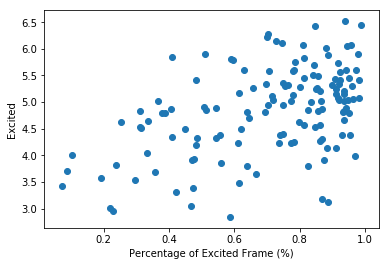

In [26]:
input = pickle.load(open('processed-data/input-interview.obj', 'rb'))
x = []
y = []
for i in range(0, len(output)):
    x.append(input[i][1])
    y.append(output[i][1])

    
plt.scatter(x, y) 
plt.xlabel("Percentage of Excited Frame (%)")
plt.ylabel("Excited")

Threshold:0.0, ACC:0.5
Threshold:0.02040816326530612, ACC:0.5
Threshold:0.04081632653061224, ACC:0.5
Threshold:0.061224489795918366, ACC:0.5
Threshold:0.08163265306122448, ACC:0.5072463768115942
Threshold:0.1020408163265306, ACC:0.5217391304347826
Threshold:0.12244897959183673, ACC:0.5217391304347826
Threshold:0.14285714285714285, ACC:0.5217391304347826
Threshold:0.16326530612244897, ACC:0.5217391304347826
Threshold:0.18367346938775508, ACC:0.5217391304347826
Threshold:0.2040816326530612, ACC:0.5289855072463768
Threshold:0.22448979591836732, ACC:0.5362318840579711
Threshold:0.24489795918367346, ACC:0.5507246376811594
Threshold:0.26530612244897955, ACC:0.5579710144927537
Threshold:0.2857142857142857, ACC:0.5579710144927537
Threshold:0.3061224489795918, ACC:0.5652173913043478
Threshold:0.32653061224489793, ACC:0.5869565217391305
Threshold:0.3469387755102041, ACC:0.6014492753623188
Threshold:0.36734693877551017, ACC:0.6086956521739131
Threshold:0.3877551020408163, ACC:0.6086956521739131
T

C:\Users\THEDE\Miniconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
C:\Users\THEDE\Miniconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide
C:\Users\THEDE\Miniconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


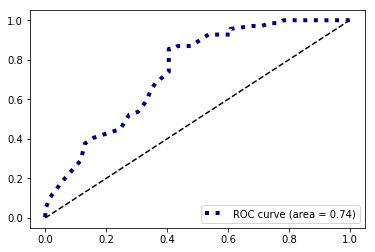

In [31]:
split_point = np.median(y)
y_binary = [ int(e >= split_point) for e in y]

thresholds = np.linspace(0, 1.0, 50)
tpr_arr = []
fpr_arr = []
thresh_arr = [] 
for t in thresholds:
    predict_binary = np.array([int(i >= t) for i in x])
    cfm = confusion_matrix(y_binary, predict_binary)
    parse_values = parse_metric(cfm)
    tpr_arr.append(parse_values['TPR'])
    fpr_arr.append(parse_values['FPR'])
    thresh_arr.append(t)
    print("Threshold:{}, ACC:{}".format(t,parse_values['ACC'][0] ))

fpr_arr = np.asarray(fpr_arr)
tpr_arr = np.asarray(tpr_arr)
roc_auc = auc(fpr_arr[:,1], tpr_arr[:,1])
plt.plot(fpr_arr[:,1], tpr_arr[:,1], label='ROC curve (area = {0:0.2f})'
               ''.format(roc_auc),
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.show();

In [ ]:
input = pickle.load(open('processed-data/input-interview.obj', 'rb'))
x = []
y = []
for i in range(0, len(output)):
    x.append(input[i][1])
    y.append(output[i][1])

    
plt.scatter(x, y) 
plt.xlabel("Percentage of Excited Frame (%)")
plt.ylabel("Excited")

# Audio

predict: [1]
predict: [1]
predict: [1]
predict: [1]
predict: [1]
predict: [1]
predict: [1]
predict: [1]
predict: [1]
predict: [1]
predict: [1]
predict: [1]
predict: [1]
predict: [1]
predict: [1]
predict: [1]
May be file is so short:  Object type: Sound
Object name: <no name>
Date: Wed Jul 18 10:55:00 2018

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 3.2653061224489797 seconds
   Total duration: 3.2653061224489797 seconds
Time sampling:
   Number of samples: 144000
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -1181 Pascal
   Maximum: 1297 Pascal
   Mean: 0.000770833333 Pascal
   Root-mean-square: 72.5770796 Pascal
Total energy: 17199.7795 Pascal² sec (energy in air: 42.9994488 Joule/m²)
Mean power (intensity) in air: 13.1685812 Watt/m² = 131.2 dB
Standard deviation in channel 1: 72.5773316 Pascal

Something wrong
predict: [1]
predict

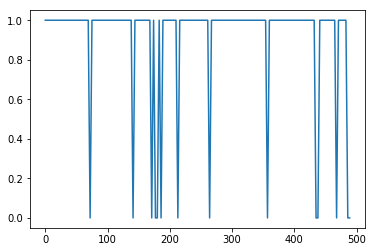

In [28]:


frame_rate = 44100
sound1 = AudioSegment.from_file(AUDIO_FILES_PATH + "/" + "p16.wav", frame_rate= frame_rate)
segment_length = 3000
results = []
for i, chunk in enumerate(sound1[::segment_length]):
    left, right = chunk.split_to_mono()
    sound = parselmouth.Sound(left.get_array_of_samples())

    # Todo
    acoustic_features = np.array(getAllFeatures(sound))
    try:
        acoustic_features = acoustic_features[1:]
        normalized_acoustic_features = (acoustic_features - min_acoustic_features[1:]) / (max_acoustic_features[1:] - min_acoustic_features[1:])
        #print(normalized_acoustic_features)
        #print(len(normalized_acoustic_features))
        #Predict
        pre = clf.predict(np.array([normalized_acoustic_features]))
        print("predict:", pre)
        results.append((int(segment_length*i / 1000), pre))
    except:
        print("Something wrong")

    
times, predicts = zip(*results)

plt.plot(times, predicts)

In [5]:
a = [(1,2),(3,4),(5,6)]
b, c = zip(*a)
print(b)

(1, 3, 5)
